<a href="https://colab.research.google.com/github/fatisepah/samples/blob/main/ML_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir=rtl>

#  آزمايش اول: طبقه بندی ارقام دستنویس 

----



<div dir=rtl>
حتما برای این تمرین از
google colab
استفاده کنید.
در زبانه
edit
روی 
notebook settings
بزنید و
Hardware accelator
را بر روی گزینه
gpu
بگذارید.

<div dir=rtl>
در بخش اول این تمرین، مدل هایی را برای طبقه بندی تصاویر موجود در دیتاست 
mnist
طراحی و ترین می کنیم. این دیتاست مجموعه ای استاندارد از اعداد به صورت دستنویس می باشد که در ادامه با آن بیشتر آشنا می شوید و مدل های مختلفی را که در درس یاد گرفته اید، بر روی این دیتاست آزمایش می کنید.

شما فقط باید در قسمت هایی که با 
to do
مشخص شده اند کد بزنید و بخش های دیگر تمرین برای شما انجام شده است. مطالعه کدهای زده شده هم خالی از لطف نیست!

امیدوارم از انجام دادن این تمرین لذت ببرید :)
</div>

<div dir=rtl>

##    مراحل اولیه پردازش دیتا

<div dir=rtl>

###    لود کردن و نمایش دیتاست

<div dir=rtl>
با استفاده از سلول زیر، دیتاست را لود کنید.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(f'We have {x_train.shape[0]} samples')
print(f'Each sample image has {x_train.shape[1]} * {x_train.shape[2]} shape')
print(f'We also have {x_test.shape[0]} samples for testing')

We have 60000 samples
Each sample image has 28 * 28 shape
We also have 10000 samples for testing


<div dir=rtl>

لینک های زیر را در صورت نیاز مطالعه کنید.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

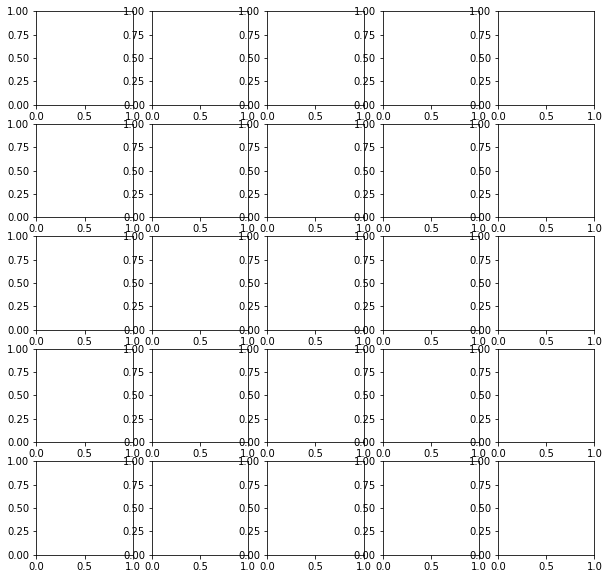

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize= (10, 10))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    # to do

<div dir=rtl>

###    پیش پردازش دیتاست

<div dir=rtl>
تصاویر موجود در دیتاست همه دوبعدی هستند و مدل های ساده ای که در این قسمت میخواهیم از آنها استفاده کنیم، ورودی های یک بعدی می پذیرند. نیاز است که در این قسمت به کمک تابع
reshape
از کتابخانه
numpy
تصاویر موجود در دیتاست را به نحو مناسبی یک بعدی کنید.

In [5]:
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(-1)
x_test = x_test.reshape(-1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(47040000,)
(7840000,)


<div dir=rtl>
پیکسل های هر تصویر یا با اعداد صحیح از 0 تا 255 مشخص می شوند و یا اعداد اعشاری بین 0 و 1. برای یادگیری بهتر مدل ها در حوزه یادگیری ماشین، معمولا مقادیر را به بازه 0 تا 1 می آورند. در سلول زیر اینکار را انجام دهید.


In [6]:
import numpy as np

print(np.max(x_train))
print(np.max(x_test))

# to do
x_train=x_train.reshape(60000,784).astype("float32")/255
x_test=x_test.reshape(10000,784).astype("float32")/255
print(np.max(x_train))
print(np.max(x_test))

255
255
1.0
1.0


<div dir=rtl>

##    ترین کردن مدل ها

<div dir=rtl>
با استفاده از سلول زیر، مدل شما تست می شود. آن را تغییر ندهید و بعد از ترین کردن هر مدل، سلول بعدی آن را ران کنید تا تست شود.

دقت کنید که اسم مدل ها را حتما
model
قرار دهید تا در سلول تست به مشکلی برنخورید.

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def test(model):

    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy of your model is {acc:.3f}')
    print('Your confustion matrix is:')
    s = sns.heatmap(cm, annot=True, fmt='d')
    s.set(xlabel='True labels', ylabel='Predicted labels')
    plt.show() 

    print('Some random tests:')
    random_indexs = np.random.choice(x_test.shape[0], 8)
    plt.figure(figsize= (15, 10))
    for i in range(1, 9):
        plt.subplot(1, 8, i)
        plt.imshow(x_test[random_indexs[i-1]].reshape(28, 28))
        plt.title(f'Prediction is {y_pred[random_indexs[i-1]]}')
        plt.axis(False)

<div dir=rtl>

###    Gaussian Naive Bayes

<div dir=rtl>
صفحه زیر را مطالعه کنید:

https://scikit-learn.org/stable/modules/naive_bayes.html


In [ ]:
from sklearn.naive_bayes import GaussianNB

# to do

In [ ]:
test(model)

NameError: ignored

<div dir=rtl>

###    Desicion Tree

<div dir=rtl>
صفحه زیر را مطالعه کنید:

https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# to do

In [ ]:
test(model)

<div dir=rtl>

###    Random Forest

<div dir=rtl>
صفحه زیر را مطالعه کنید:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

در صورت نیاز در پارامترهای  
n_estimators
و
max_depth
تغییرات ایجاد کنید تا به بهترین نتیجه برسید.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# to do

In [ ]:
test(model)

<div dir=rtl>

###    Logistic Regression

<div dir=rtl>
صفحه زیر را مطالعه کنید:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

در صورت نیاز در پارامتر 
max_iter
تغییرات ایجاد کنید تا به بهترین نتیجه برسید.

In [ ]:
from sklearn.linear_model import LogisticRegression

# to do

In [ ]:
test(model)

<div dir=rtl>

###    SVM

<div dir=rtl>
صفحه زیر را مطالعه کنید:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

در صورت نیاز در پارامتر 
C
تغییرات ایجاد کنید تا به بهترین نتیجه برسید.

In [ ]:
from sklearn.svm import SVC

# to do

In [ ]:
test(model)

<div dir=rtl>

###    MLP

<div dir=rtl>
صفحه زیر را مطالعه کنید:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

در صورت نیاز در پارامتر 
hidden_layer_sizes
تغییرات ایجاد کنید تا به بهترین نتیجه برسید.
 مثال هایی در لینک ارائه شده است، ولی در صورت نیاز به توضیح بیشتر در گروه مطرح کنید.

In [ ]:
from sklearn.neural_network import MLPClassifier

# to do

In [ ]:
test(model)